# Rainfall Prediction using Machine Learning 

#### Today there are no certain methods by using which we can predict whether there will be rainfall today or not. Even the meteorological department’s prediction fails sometimes. In this project, I learn how to build a machine learning model which can predict whether there will be rainfall today or not based on some atmospheric factors. 

## Imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

In [4]:
#For warnings-

import warnings
warnings.filterwarnings('ignore')

## Loading Dataset and Understanding it:

In [7]:
df = pd.read_csv('D:\Rain.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [8]:
df.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [9]:
#Check the size of the dataset-

df.shape

(366, 12)

In [10]:
#Check which column of the dataset contains which type of data-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [11]:
#As per the above information regarding the data in each column we can observe that there are no null values-

df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,366.0,15.756831,8.823592,1.0,8.000,16.00,23.000,31.0
pressure,366.0,1013.742623,6.414776,998.5,1008.500,1013.00,1018.100,1034.6
maxtemp,366.0,26.191257,5.978343,7.1,21.200,27.75,31.200,36.3
temparature,366.0,23.747268,5.632813,4.9,18.825,25.45,28.600,32.4
mintemp,366.0,21.894536,5.594153,3.1,17.125,23.70,26.575,30.0
dewpoint,366.0,19.989071,5.997021,-0.4,16.125,21.95,25.000,26.7
humidity,366.0,80.177596,10.062470,36.0,75.000,80.50,87.000,98.0
cloud,366.0,71.128415,21.798012,0.0,58.000,80.00,88.000,100.0
sunshine,366.0,4.419399,3.934398,0.0,0.500,3.50,8.200,12.1
winddirection,365.0,101.506849,81.723724,10.0,40.000,70.00,190.000,350.0


## Data Cleaning:

In [12]:
df.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [13]:
df.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [14]:
#Here we can observe that there are unnecessary spaces in the names of the columns let’s remove that-

df.rename(str.strip,
          axis='columns',
          inplace=True)
 
df.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [15]:
#Now it’s time for null value imputation-

for col in df.columns:
   
    #Checking if the column contains any null values:

    if df[col].isnull().sum() > 0:
        val = df[col].mean()
        df[col] = df[col].fillna(val)
     
df.isnull().sum().sum()

0

## Exploratory Data Analysis:

#### EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. Here we will see how to check the data imbalance and skewness of the data.

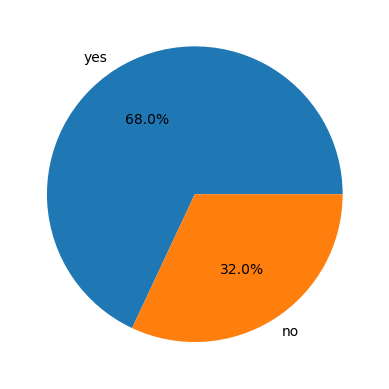

In [16]:
#Pie chart for the number of data for each target-

plt.pie(df['rainfall'].value_counts().values,
        labels = df['rainfall'].value_counts().index,
        autopct='%1.1f%%')

plt.show()

In [17]:
df.groupby('rainfall').mean()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
rainfall,,,,,,,,,,,
no,15.623932,1014.576923,27.070940,24.053846,21.957265,18.766667,73.000000,51.256410,7.586325,103.076923,19.275214
yes,15.819277,1013.350602,25.777912,23.603213,21.865060,20.563454,83.550201,80.465863,2.931325,100.769104,22.599747


#### From above we can clearly draw these observations:

#### 1.) Maxtemp is relatively lower on the days of the rainfall.
#### 2.) Dewpoint value is higher on the days of rainfall.
#### 3.) Humidity is high on the days when rainfall is expected.
#### 4.) Obviously, clouds must be there for rainfall.
#### 5.) Sunshine is also less on the days of rainfall.
#### 6.) Windspeed is higher on the days of rainfall.
#### The observations we have drawn from the above dataset are very much similar to what is observed in the real life as well.

In [18]:
features = list(df.select_dtypes(include = np.number).columns)
features.remove('day')

print(features)

['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


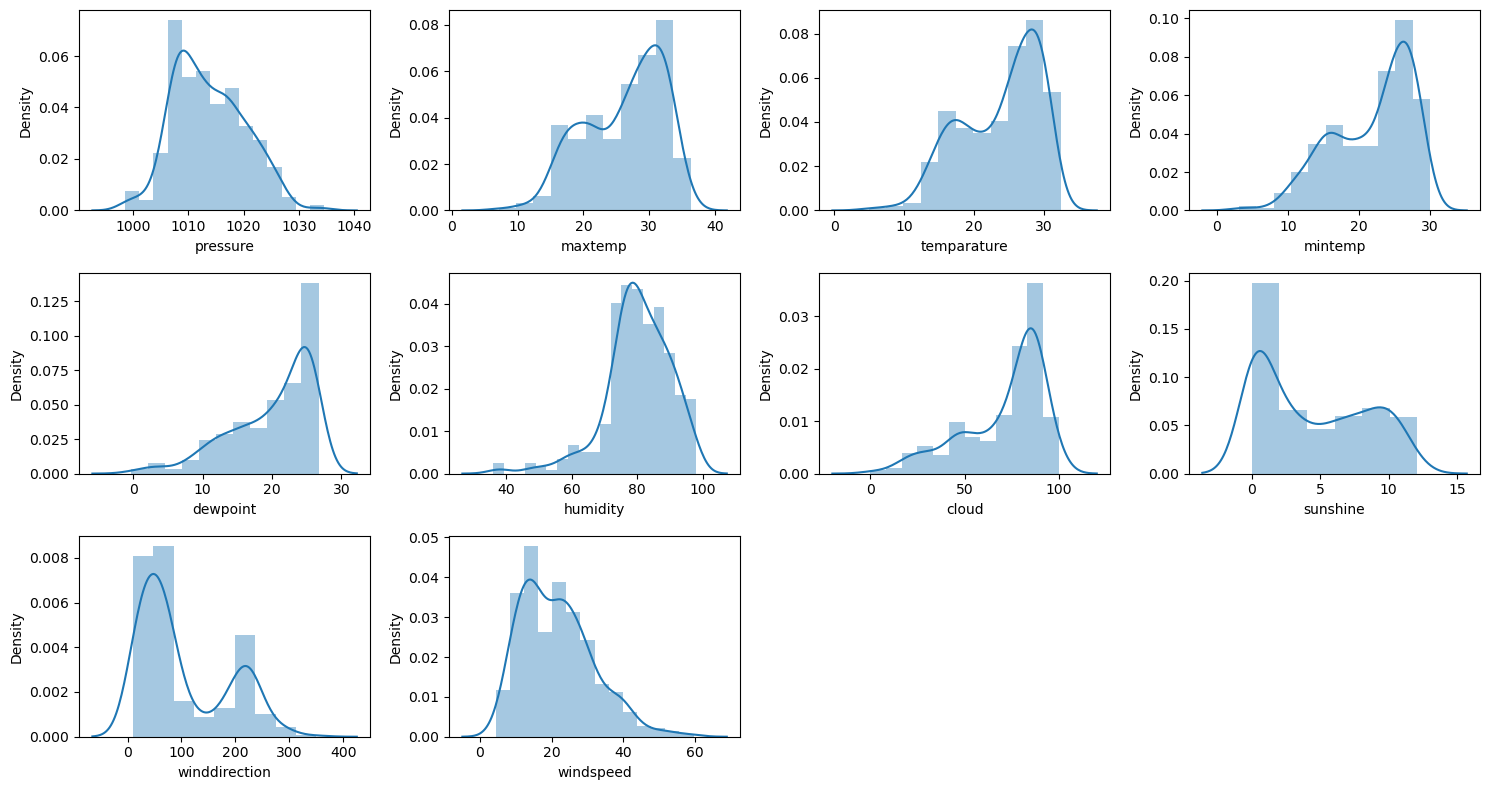

In [19]:
#Let’s check the distribution of the continuous features given in the dataset-

plt.subplots(figsize=(15,8))
 
for i, col in enumerate(features):
    plt.subplot(3,4, i + 1)
    sb.distplot(df[col])
    
plt.tight_layout()
plt.show()

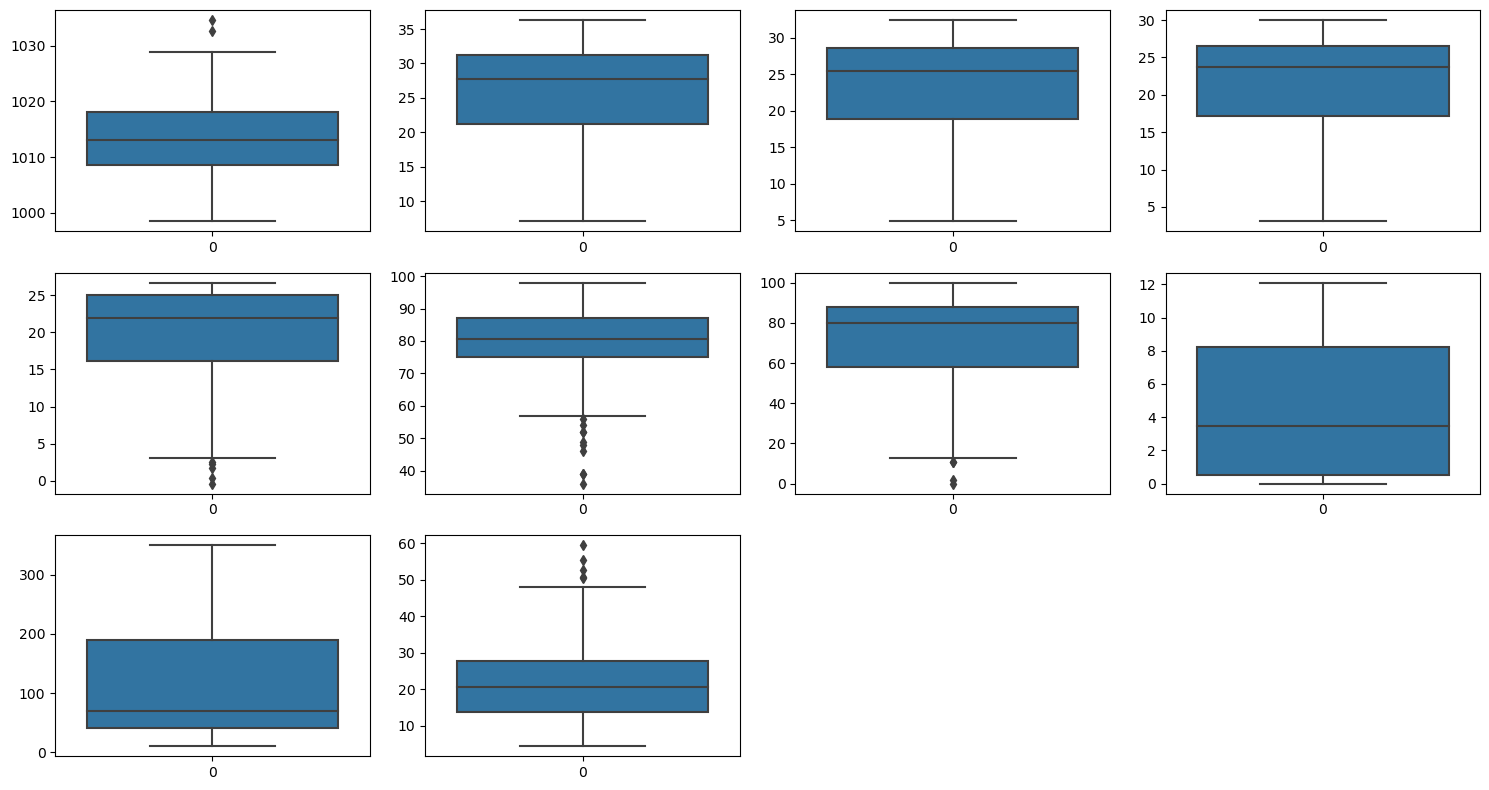

In [20]:
#Let’s draw boxplots for the continuous variable to detect the outliers present in the data-

plt.subplots(figsize=(15,8))
 
for i, col in enumerate(features):
    plt.subplot(3,4, i + 1)
    sb.boxplot(df[col])
    
plt.tight_layout()
plt.show()

#### There are outliers in the data but sadly we do not have much data so, we cannot remove this.

In [21]:
df.replace({'yes':1, 'no':0}, inplace=True)

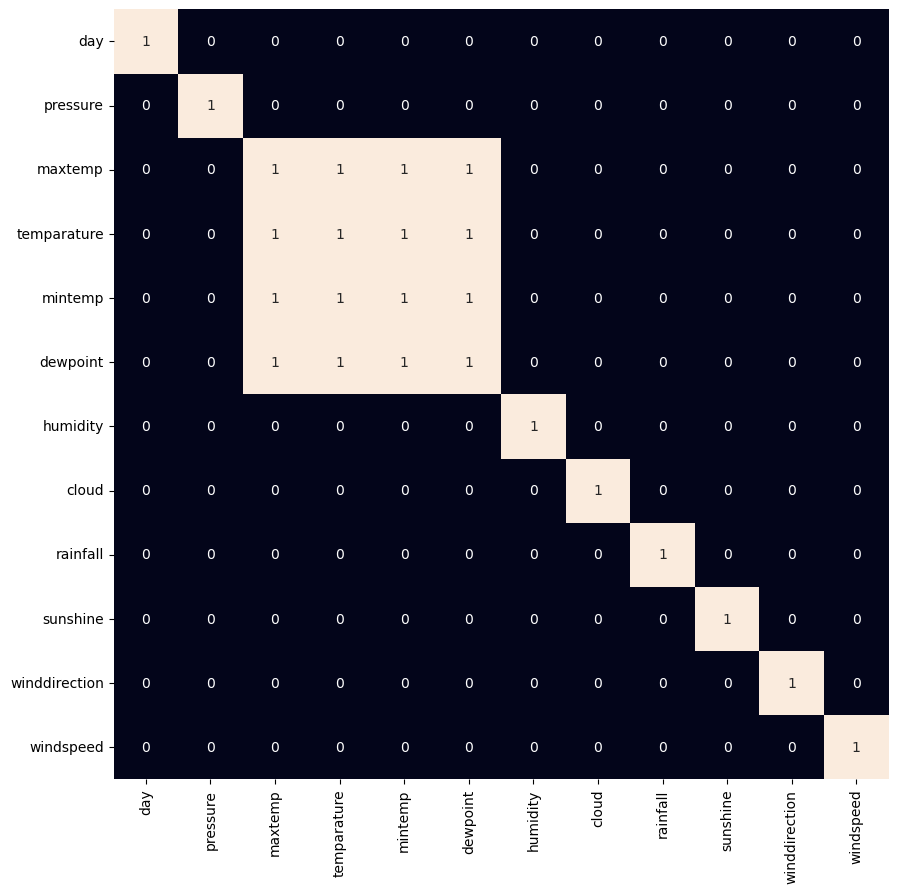

In [22]:
#Corr-

plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)

plt.show()

## Model Training:

In [26]:
#Here we separated the features and target variables and split them into training and the testing data by 
#using which we will select the model which is performing best on the validation data-

features = df.drop(['day', 'rainfall'], axis=1)
target = df.rainfall

In [30]:
X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size = 0.2,
                                                  stratify = target,
                                                  random_state=2)
 
# As the data was highly imbalanced we will
# balance it by adding repetitive rows of minority class.

ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train,Y_train)

In [28]:
# Normalizing the features for stable and fast training.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

#### Let’s train some state-of-the-art models for classification and train them on our training data-

#### 1.) LogisticRegression - is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not. It is a kind of statistical algorithm, which analyze the relationship between a set of independent variables and the dependent binary variables. It is a powerful tool for decision-making. For example email spam or not. 

#### 2.) XGBClassifier - is an implementation of Gradient Boosted decision trees. This library was written in C++. It is a type of Software library that was designed basically to improve speed and model performance. It has recently been dominating in applied machine learning. XGBoost models majorly dominate in many Kaggle Competitions. In this algorithm, decision trees are created in sequential form.

#### 3.) SVC -  is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. The objective of the SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends upon the number of features. If the number of input features is two, then the hyperplane is just a line. If the number of input features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when the number of features exceeds three. 

In [36]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]
 
for i in range(3):
    models[i].fit(X, Y)
 
    print(f'\n{models[i]} : ')
 
    train_preds = models[i].predict_proba(X)
    print('\nTraining Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))
  
    val_preds = models[i].predict_proba(X_val)
    print('\nValidation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
    
print()


LogisticRegression() : 

Training Accuracy :  0.8888159389914396

Validation Accuracy :  0.8833333333333333

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 

Training Accuracy :  0.9999999999999999

Validation Accuracy :  0.8400000000000001

SVC(probability=True) : 

Training Accuracy :  0.8

## Model Evaluation:

In [41]:
from sklearn.metrics import confusion_matrix

#Compute confusion matrix-

cm = confusion_matrix(Y_val, models[2].predict(X_val))

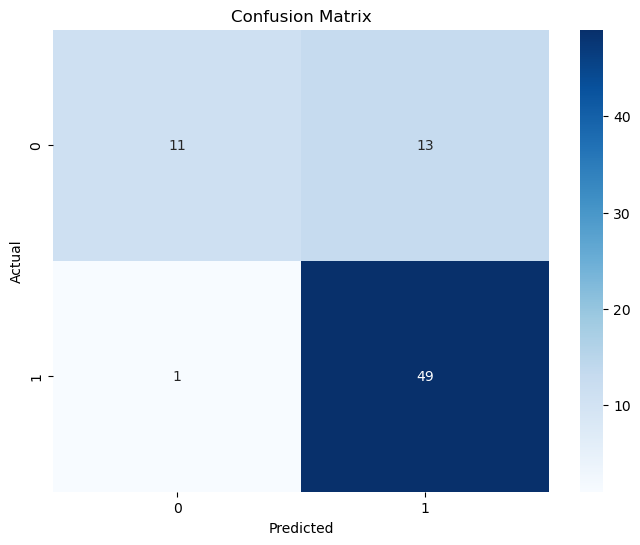

In [42]:
#Plot confusion matrix using heatmap-

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [43]:
#Let’s plot the classification report as well for the validation data using the SVC  model-

print(metrics.classification_report(Y_val,
                                    models[2].predict(X_val)))

              precision    recall  f1-score   support

           0       0.92      0.46      0.61        24
           1       0.79      0.98      0.87        50

    accuracy                           0.81        74
   macro avg       0.85      0.72      0.74        74
weighted avg       0.83      0.81      0.79        74

